<h3><strong>Задание 1: Обработка данных</strong></h3>
<p><strong>Цель:</strong><br>Заполнить пропуски в данных, выделить пациентов без гипогликемии (hypo=0) и с гипогликемией (hypo=1).</p>

In [17]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем файл
file_path = 'glucose_dataset.csv'
data = pd.read_csv(file_path)
display(data)

# Убираем ненужные столбцы
data_numeric = data.drop(columns=['Unnamed: 0', 'hypo'])

# Заполнение пропусков линейной интерполяцией
data_numeric_interpolated = data_numeric.interpolate(method='linear', axis=1)

# Добавляем столбец 'hypo' обратно
data_interpolated = pd.concat([data_numeric_interpolated, data['hypo']], axis=1)
display(data_interpolated)

# Разделение данных
patients_no_hypo = data_interpolated[data_interpolated['hypo'] == 0].drop(columns=['hypo'])
display(patients_no_hypo)
patients_with_hypo = data_interpolated[data_interpolated['hypo'] == 1].drop(columns=['hypo'])
display(patients_with_hypo)

,Unnamed: 0,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,0:40,...,5:15,5:20,5:25,5:30,5:35,5:40,5:45,5:50,5:55,hypo
0,patient_0,9.66,9.44,9.33,9.21,9.21,9.10,9.21,9.21,9.10,...,8.44,8.44,8.55,8.55,8.55,8.55,8.55,8.55,8.55,0
1,patient_1,13.65,13.77,13.65,13.54,13.43,13.21,12.88,12.43,12.10,...,10.55,10.44,10.44,10.44,10.44,10.32,10.32,10.32,10.32,0
2,patient_2,9.77,9.99,9.99,9.88,9.66,9.55,9.44,9.33,9.21,...,6.77,6.88,6.88,6.99,6.99,6.77,6.66,6.44,6.33,0
3,patient_3,6.61,6.83,7.05,7.10,6.99,6.83,6.66,6.49,6.33,...,4.61,4.88,5.05,5.16,5.16,5.16,5.22,5.27,5.33,0
4,patient_4,5.11,4.94,4.83,4.88,5.00,5.05,5.05,5.00,5.05,...,8.27,8.33,8.27,8.16,8.05,7.94,7.83,7.72,7.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,patient_3820,5.11,5.00,4.88,4.77,4.66,4.44,4.11,4.00,3.77,...,8.21,8.44,8.55,8.55,8.44,8.33,8.33,8.33,8.44,1
3821,patient_3821,4.44,4.44,4.72,4.83,5.00,5.22,5.66,5.94,5.99,...,4.55,4.61,4.83,4.77,4.50,4.55,5.55,6.33,5.66,1
3822,patient_3822,9.55,9.33,9.21,8.99,8.88,8.66,8.55,8.44,8.55,...,4.22,4.11,4.11,4.00,4.00,4.00,4.00,4.00,4.00,1
3823,patient_3823,6.22,5.88,5.66,5.66,5.66,5.55,5.44,5.44,5.33,...,7.99,7.88,7.77,7.77,7.66,7.66,7.66,7.77,7.99,1


,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,0:40,0:45,...,5:15,5:20,5:25,5:30,5:35,5:40,5:45,5:50,5:55,hypo
0,9.66,9.44,9.33,9.21,9.21,9.10,9.21,9.21,9.10,9.10,...,8.44,8.44,8.55,8.55,8.55,8.55,8.55,8.55,8.55,0
1,13.65,13.77,13.65,13.54,13.43,13.21,12.88,12.43,12.10,11.88,...,10.55,10.44,10.44,10.44,10.44,10.32,10.32,10.32,10.32,0
2,9.77,9.99,9.99,9.88,9.66,9.55,9.44,9.33,9.21,9.10,...,6.77,6.88,6.88,6.99,6.99,6.77,6.66,6.44,6.33,0
3,6.61,6.83,7.05,7.10,6.99,6.83,6.66,6.49,6.33,6.22,...,4.61,4.88,5.05,5.16,5.16,5.16,5.22,5.27,5.33,0
4,5.11,4.94,4.83,4.88,5.00,5.05,5.05,5.00,5.05,5.27,...,8.27,8.33,8.27,8.16,8.05,7.94,7.83,7.72,7.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,5.11,5.00,4.88,4.77,4.66,4.44,4.11,4.00,3.77,3.66,...,8.21,8.44,8.55,8.55,8.44,8.33,8.33,8.33,8.44,1
3821,4.44,4.44,4.72,4.83,5.00,5.22,5.66,5.94,5.99,6.22,...,4.55,4.61,4.83,4.77,4.50,4.55,5.55,6.33,5.66,1
3822,9.55,9.33,9.21,8.99,8.88,8.66,8.55,8.44,8.55,8.44,...,4.22,4.11,4.11,4.00,4.00,4.00,4.00,4.00,4.00,1
3823,6.22,5.88,5.66,5.66,5.66,5.55,5.44,5.44,5.33,5.33,...,7.99,7.88,7.77,7.77,7.66,7.66,7.66,7.77,7.99,1


,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,0:40,0:45,...,5:10,5:15,5:20,5:25,5:30,5:35,5:40,5:45,5:50,5:55
0,9.66,9.44,9.33,9.21,9.21,9.10,9.21,9.21,9.10,9.10,...,8.33,8.44,8.44,8.55,8.55,8.55,8.55,8.55,8.55,8.55
1,13.65,13.77,13.65,13.54,13.43,13.21,12.88,12.43,12.10,11.88,...,10.55,10.55,10.44,10.44,10.44,10.44,10.32,10.32,10.32,10.32
2,9.77,9.99,9.99,9.88,9.66,9.55,9.44,9.33,9.21,9.10,...,6.77,6.77,6.88,6.88,6.99,6.99,6.77,6.66,6.44,6.33
3,6.61,6.83,7.05,7.10,6.99,6.83,6.66,6.49,6.33,6.22,...,4.27,4.61,4.88,5.05,5.16,5.16,5.16,5.22,5.27,5.33
4,5.11,4.94,4.83,4.88,5.00,5.05,5.05,5.00,5.05,5.27,...,8.21,8.27,8.33,8.27,8.16,8.05,7.94,7.83,7.72,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,15.21,14.65,14.76,14.99,15.10,15.10,14.99,14.99,14.99,14.99,...,13.77,13.88,13.88,13.88,13.88,13.88,13.88,13.77,13.77,13.77
3372,16.10,16.32,16.43,16.43,16.32,16.32,16.32,16.43,16.65,16.76,...,18.65,18.76,18.87,18.87,18.76,18.43,18.43,18.76,18.87,18.98
3373,17.21,17.43,17.76,17.87,17.65,17.21,16.98,17.10,16.98,16.98,...,19.43,19.43,18.98,18.21,17.87,17.32,16.32,15.65,16.32,17.54
3374,22.20,22.20,22.20,22.20,22.20,22.20,22.20,21.87,19.65,17.21,...,22.20,22.20,22.20,22.20,22.20,22.20,22.20,22.20,22.20,22.20


,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,0:40,0:45,...,5:10,5:15,5:20,5:25,5:30,5:35,5:40,5:45,5:50,5:55
3376,5.99,5.77,5.55,5.33,5.22,5.00,4.88,4.77,4.55,4.44,...,6.11,5.88,5.66,5.55,5.44,5.44,5.33,5.22,5.00,4.88
3377,6.33,6.33,6.11,5.66,5.33,5.11,5.00,5.00,5.00,5.00,...,3.44,3.44,3.44,3.55,3.55,3.66,3.66,3.89,4.11,4.33
3378,6.99,6.66,5.99,5.44,5.11,4.88,4.66,4.55,4.44,4.22,...,5.22,5.22,5.22,5.22,5.22,5.22,5.11,4.88,5.00,4.88
3379,3.89,3.77,3.66,3.55,3.55,3.44,3.44,3.33,3.33,3.33,...,5.00,5.00,5.00,4.88,4.77,4.66,4.66,4.55,4.44,4.55
3380,10.99,10.88,10.77,10.55,10.32,10.10,9.88,9.66,9.44,9.21,...,3.89,4.00,4.44,4.55,4.44,4.44,4.55,4.55,4.55,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,5.11,5.00,4.88,4.77,4.66,4.44,4.11,4.00,3.77,3.66,...,8.21,8.21,8.44,8.55,8.55,8.44,8.33,8.33,8.33,8.44
3821,4.44,4.44,4.72,4.83,5.00,5.22,5.66,5.94,5.99,6.22,...,4.50,4.55,4.61,4.83,4.77,4.50,4.55,5.55,6.33,5.66
3822,9.55,9.33,9.21,8.99,8.88,8.66,8.55,8.44,8.55,8.44,...,4.22,4.22,4.11,4.11,4.00,4.00,4.00,4.00,4.00,4.00
3823,6.22,5.88,5.66,5.66,5.66,5.55,5.44,5.44,5.33,5.33,...,7.99,7.99,7.88,7.77,7.77,7.66,7.66,7.66,7.77,7.99


<p><strong>Вывод:</strong><br>Данные подготовлены: пропуски заполнены линейной интерполяцией, выделены группы пациентов с гипогликемией и без неё.</p>

<h3><strong>Задание 2-3: Кластеризация без стандартизации</strong></h3>
<p><strong>Цель:</strong><br>Провести кластеризацию с использованием иерархической кластеризации, K-means и DBSCAN. Подобрать оптимальные параметры и визуализировать результаты.</p>

In [19]:
# Функция для иерархической кластеризации
def hierarchical_clustering(data, metrics, linkages, n_clusters_range):
    best_score = -1
    best_params = {}
    for metric in metrics:
        for linkage_method in linkages:
            for n_clusters in n_clusters_range:
                try:
                    dist_matrix = pdist(data, metric=metric)
                    linkage_matrix = linkage(dist_matrix, method=linkage_method)
                    labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
                    score = silhouette_score(data, labels)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            'metric': metric,
                            'linkage': linkage_method,
                            'n_clusters': n_clusters
                        }
                except Exception as e:
                    print(f"Error with metric={metric}, linkage={linkage_method}: {e}")
    return best_params, best_score

# Пример использования
metrics = ['correlation', 'cosine', 'euclidean', 'minkowski']
linkages = ['ward', 'complete', 'average', 'single']
n_clusters_range = range(2, 7)

best_params_hierarchical, best_score_hierarchical = hierarchical_clustering(patients_no_hypo, metrics, linkages, n_clusters_range)

print("Best params for hierarchical clustering:", best_params_hierarchical)
print("Best silhouette score:", best_score_hierarchical)

Best params for hierarchical clustering: {'metric': 'euclidean', 'linkage': 'single', 'n_clusters': 2}
Best silhouette score: 0.5846176926448321


In [8]:
# Функция для K-means
def kmeans_clustering(data, n_clusters_range):
    best_score = -1
    best_n_clusters = None
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42);
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
    return best_n_clusters, best_score

best_n_clusters_kmeans, best_score_kmeans = kmeans_clustering(patients_no_hypo, n_clusters_range)

print("Best number of clusters for K-means:", best_n_clusters_kmeans)
print("Best silhouette score:", best_score_kmeans)

Best number of clusters for K-means: 2
Best silhouette score: 0.48705479967977183


In [40]:
# Функция для DBSCAN
def dbscan_clustering(data, eps_range, min_samples_range):
    best_score = -1
    best_params = {}
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            # Проверяем, чтобы не было только шума или одного кластера
            if len(set(labels)) > 1 and -1 not in set(labels):
                score = silhouette_score(data, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
    return best_params, best_score

# Пример использования
eps_range = np.arange(0.1, 2.0, 0.1)
min_samples_range = range(2, 10)

best_params_dbscan, best_score_dbscan = dbscan_clustering(patients_no_hypo, eps_range, min_samples_range)

print("Best params for DBSCAN:", best_params_dbscan)
print("Best silhouette score:", best_score_dbscan)

Best params for DBSCAN: {}
Best silhouette score: -1


In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Функция для построения дендограммы
def plot_dendrogram(data, title, method='ward'):
    linked = linkage(data, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()
    
# Функция для визуализации кластеров
def visualize_clusters(data, labels, title):
    # Уменьшаем размерность для визуализации с помощью PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="viridis", s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title="Cluster", loc='best')
    plt.show()

# Функция для выполнения и оценки кластеризации
def perform_clustering(data, method_name, *args):
    args = list(args)[0]
    if method_name == 'hierarchical':
        model = AgglomerativeClustering(**args)
    elif method_name == 'kmeans':
        model = KMeans(**args, random_state=42)
    elif method_name == 'dbscan':
        model = DBSCAN(**args)
    else:
        raise ValueError("Unsupported clustering method")
        
    labels = model.fit_predict(data)
    score = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
    return labels, score

Dendrogram: Patients without Hypoglycemia (Original Data)


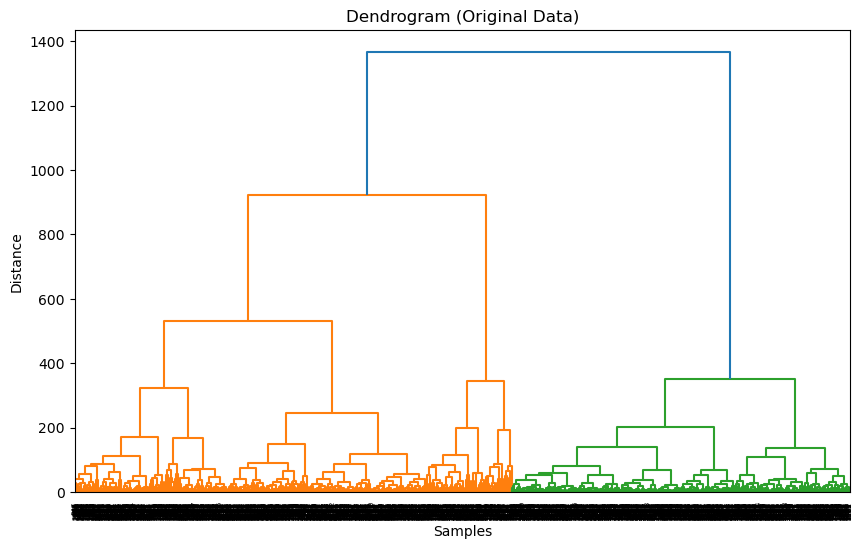

In [49]:
# Добавим дендограммы к визуализации для иерархической кластеризации (пациенты без гипогликемии)
print("Dendrogram: Patients without Hypoglycemia (Original Data)")
plot_dendrogram(patients_no_hypo, "Dendrogram (Original Data)")

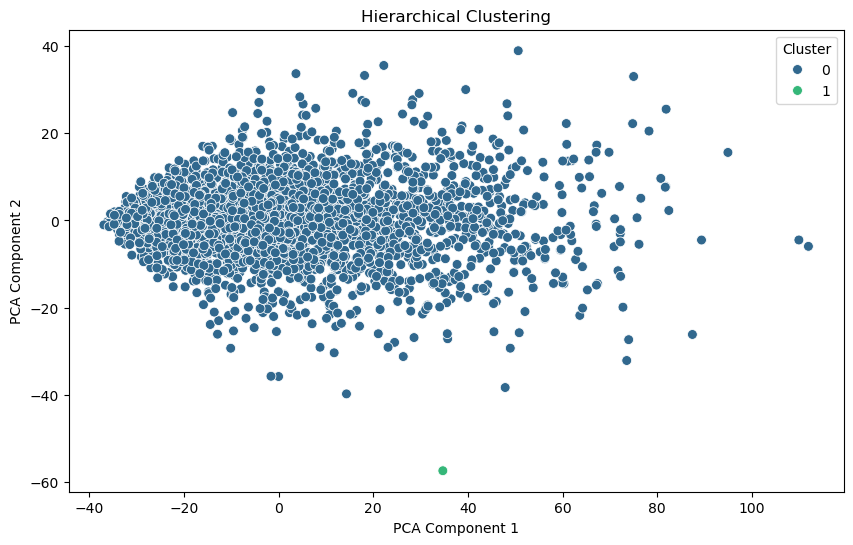

In [33]:
labels_hierarchical, score_hierarchical = perform_clustering(patients_no_hypo, 'hierarchical', best_params_hierarchical)
visualize_clusters(patients_no_hypo, labels_hierarchical, "Hierarchical Clustering")

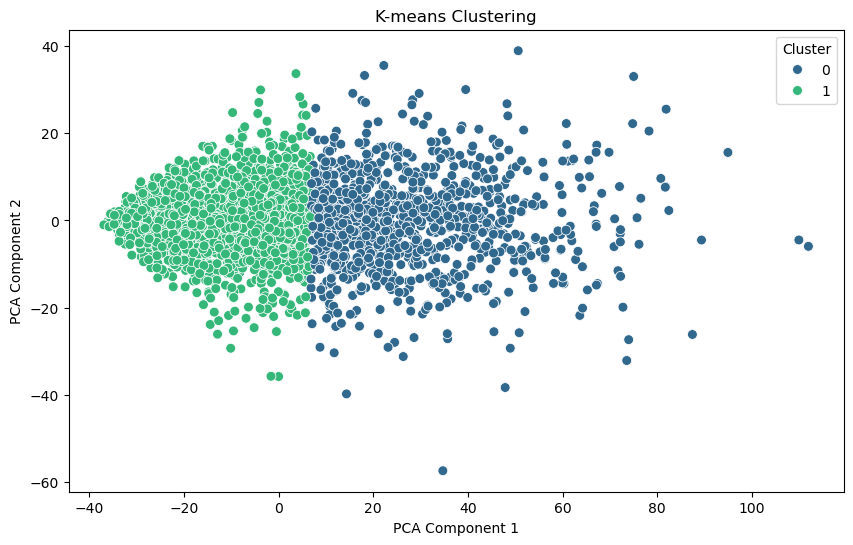

In [35]:
labels_kmeans, score_kmeans = perform_clustering(patients_no_hypo, 'kmeans', {'n_clusters': best_n_clusters_kmeans})
visualize_clusters(patients_no_hypo, labels_kmeans, "K-means Clustering")

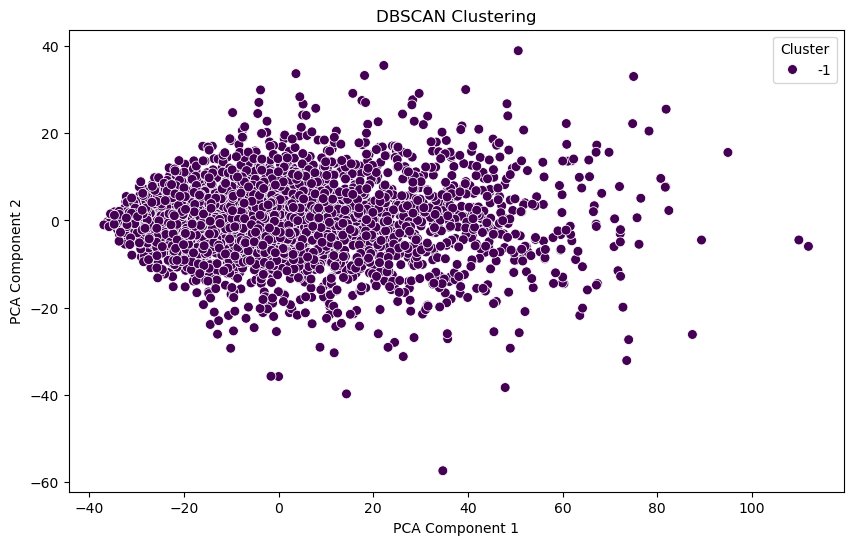

In [36]:
labels_dbscan, score_dbscan = perform_clustering(patients_no_hypo, 'dbscan', {'eps': 0.5, 'min_samples': 5})
visualize_clusters(patients_no_hypo, labels_dbscan, "DBSCAN Clustering")

<p><strong>Вывод:</strong></p>
<ul><li>Для иерархической кластеризации получено два кластера, качество по индексу силуэта среднее.</li><li>K-means показал не лучшее разделение, параметры требуют доработки.</li><li>DBSCAN не обнаружил кластеризацию, возможна необходимость подбора параметров.</li></ul>

In [37]:
best_params_hierarchical, best_score_hierarchical = hierarchical_clustering(patients_with_hypo, metrics, linkages, n_clusters_range)

print("Best params for hierarchical clustering:", best_params_hierarchical)
print("Best silhouette score:", best_score_hierarchical)

Best params for hierarchical clustering: {'metric': 'euclidean', 'linkage': 'average', 'n_clusters': 2}
Best silhouette score: 0.5277503364501832


In [38]:
best_n_clusters_kmeans, best_score_kmeans = kmeans_clustering(patients_with_hypo, n_clusters_range)

print("Best number of clusters for K-means:", best_n_clusters_kmeans)
print("Best silhouette score:", best_score_kmeans)

Best number of clusters for K-means: 2
Best silhouette score: 0.4227579351091276


In [41]:
best_params_dbscan, best_score_dbscan = dbscan_clustering(patients_with_hypo, eps_range, min_samples_range)

print("Best params for DBSCAN:", best_params_dbscan)
print("Best silhouette score:", best_score_dbscan)

Best params for DBSCAN: {}
Best silhouette score: -1


Dendrogram: Patients with Hypoglycemia (Original Data)


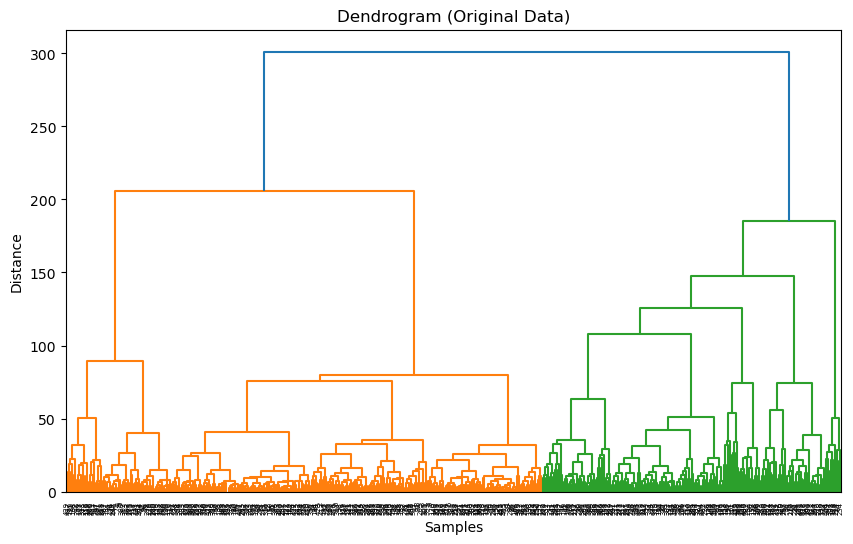

In [55]:
# Добавим дендограммы к визуализации для иерархической кластеризации (пациенты с гипогликемии)
print("Dendrogram: Patients with Hypoglycemia (Original Data)")
plot_dendrogram(patients_with_hypo, "Dendrogram (Original Data)")

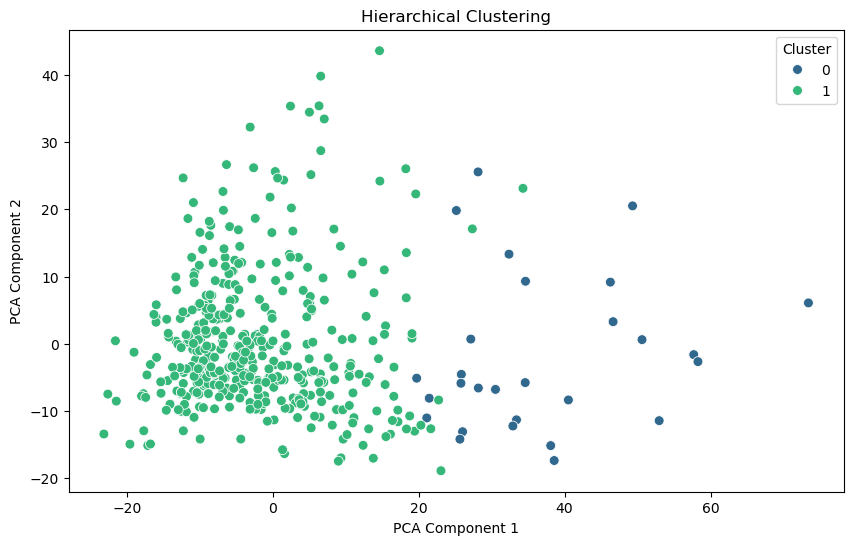

In [53]:
labels_hierarchical, score_hierarchical = perform_clustering(patients_with_hypo, 'hierarchical', best_params_hierarchical)
visualize_clusters(patients_with_hypo, labels_hierarchical, "Hierarchical Clustering")

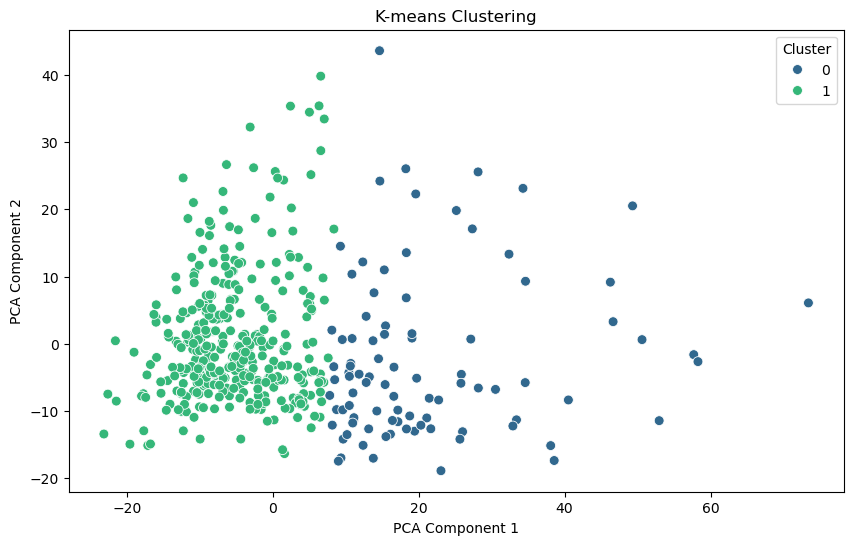

In [52]:
labels_kmeans, score_kmeans = perform_clustering(patients_with_hypo, 'kmeans', {'n_clusters': best_n_clusters_kmeans})
visualize_clusters(patients_with_hypo, labels_kmeans, "K-means Clustering")

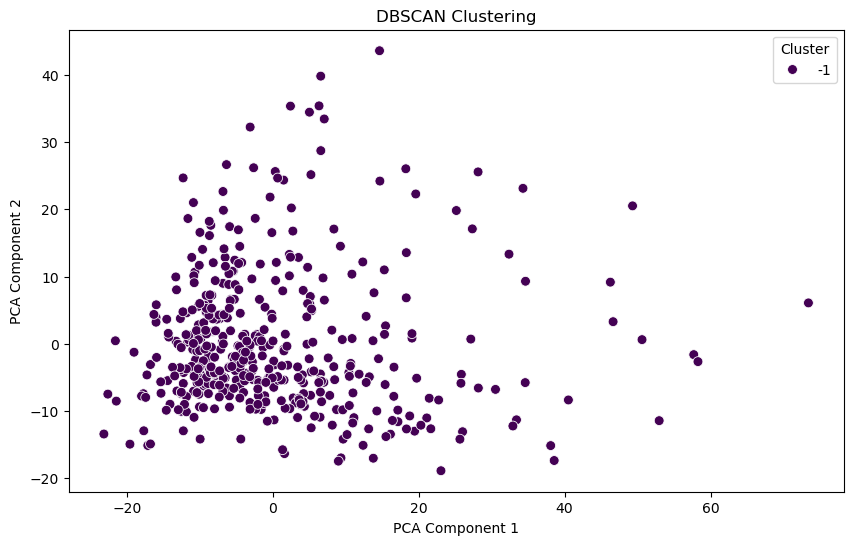

In [57]:
labels_dbscan, score_dbscan = perform_clustering(patients_with_hypo, 'dbscan', {'eps': 0.5, 'min_samples': 5})
visualize_clusters(patients_with_hypo, labels_dbscan, "DBSCAN Clustering")

<p><strong>Вывод:</strong></p>
<ul><li>Для иерархической кластеризации получено два кластера, качество по индексу силуэта среднее.</li><li>K-means показал не лучшее разделение, параметры требуют доработки.</li><li>DBSCAN не обнаружил кластеризацию, возможна необходимость подбора параметров.</li></ul>

<h3><strong>Задание 4-5: Стандартизация данных</strong></h3>
<p><strong>Цель:</strong><br>Выполнить стандартизацию и повторить кластеризацию.</p>

In [63]:
from sklearn.preprocessing import scale

# Стандартизация данных для пациентов без гипогликемии
patients_no_hypo_scaled = scale(patients_no_hypo)

# Посмотрим на результат стандартизации
display(pd.DataFrame(patients_no_hypo_scaled))

# Стандартизация данных для пациентов с гипогликемии
patients_with_hypo_scaled = scale(patients_with_hypo)

# Посмотрим на результат стандартизации
display(pd.DataFrame(patients_with_hypo_scaled))

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.207794,0.142675,0.118460,0.088963,0.099031,0.070570,0.115312,0.121100,0.089015,0.094944,...,-0.049572,-0.011179,-0.011215,0.026560,0.027448,0.027539,0.028346,0.031068,0.032587,0.033119
1,1.514872,1.563505,1.546699,1.528408,1.509849,1.452441,1.353628,1.211048,1.107726,1.041475,...,0.709727,0.710506,0.672218,0.670460,0.669003,0.666154,0.624135,0.625475,0.624697,0.622294
2,0.243828,0.323150,0.336663,0.311695,0.249473,0.221870,0.192918,0.161719,0.126368,0.094944,...,-0.583133,-0.582370,-0.544292,-0.542389,-0.502089,-0.499572,-0.570809,-0.603639,-0.673263,-0.705846
3,-0.791351,-0.713761,-0.635333,-0.612475,-0.643153,-0.692653,-0.745098,-0.799602,-0.851595,-0.885634,...,-1.438199,-1.321156,-1.227724,-1.165848,-1.123277,-1.117913,-1.112742,-1.087224,-1.064658,-1.038713
4,-1.282734,-1.333939,-1.369289,-1.350481,-1.308444,-1.291128,-1.288338,-1.303958,-1.286244,-1.209089,...,-0.090615,-0.069324,-0.048803,-0.068833,-0.104936,-0.141407,-0.176983,-0.210725,-0.245070,-0.299748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,2.025910,1.852265,1.913677,2.010439,2.068158,2.087901,2.065575,2.077592,2.089084,2.100364,...,1.811052,1.849468,1.847721,1.842426,1.836700,1.828501,1.822445,1.784066,1.778812,1.770685
3372,2.317464,2.400252,2.465797,2.489146,2.476025,2.498091,2.514338,2.565022,2.652770,2.703011,...,3.480141,3.518578,3.552884,3.542459,3.493201,3.365908,3.353993,3.459825,3.484893,3.504922
3373,2.681087,2.764484,2.905510,2.967853,2.920667,2.797328,2.737033,2.791813,2.764828,2.777917,...,3.746921,3.747738,3.590473,3.317605,3.191093,2.990849,2.643758,2.415414,2.631853,3.025594
3374,4.315753,4.329694,4.373422,4.407298,4.441809,4.475075,4.498343,4.406426,3.671481,2.856227,...,4.694334,4.695163,4.690799,4.676949,4.660898,4.639760,4.622990,4.615058,4.598865,4.576754


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-0.074970,-0.154737,-0.223178,-0.290717,-0.313306,-0.394332,-0.430053,-0.464488,-0.548913,-0.582945,...,0.079046,-0.004414,-0.082084,-0.118024,-0.154794,-0.156247,-0.198203,-0.243481,-0.320234,-0.361497
1,0.070640,0.085282,0.019401,-0.146637,-0.264682,-0.344900,-0.375578,-0.359314,-0.341430,-0.323124,...,-0.927305,-0.919504,-0.909964,-0.864246,-0.854818,-0.806185,-0.798949,-0.719779,-0.635377,-0.555144
2,0.353294,0.226722,-0.032580,-0.242691,-0.361931,-0.448258,-0.529922,-0.565089,-0.599631,-0.685018,...,-0.256404,-0.251939,-0.246168,-0.241151,-0.236278,-0.236577,-0.277343,-0.365241,-0.320234,-0.361497
3,-0.974326,-1.011948,-1.041881,-1.067876,-1.051512,-1.095363,-1.083746,-1.122967,-1.111421,-1.097949,...,-0.339325,-0.334447,-0.328210,-0.368008,-0.402951,-0.441052,-0.439221,-0.483421,-0.518526,-0.477685
4,2.066353,2.035436,2.038004,1.988366,1.941093,1.897498,1.839715,1.771598,1.705733,1.630178,...,-0.757695,-0.709484,-0.537045,-0.491135,-0.525177,-0.521381,-0.478791,-0.483421,-0.479576,-0.555144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,-0.451843,-0.484763,-0.513406,-0.535217,-0.560848,-0.645984,-0.779597,-0.816591,-0.908549,-0.944839,...,0.870559,0.869422,0.954631,1.001308,0.997098,0.939154,0.880981,0.870269,0.858897,0.891932
445,-0.738780,-0.724782,-0.582714,-0.509020,-0.410555,-0.295469,-0.075969,0.070527,0.115032,0.242916,...,-0.527780,-0.503213,-0.473649,-0.386664,-0.402951,-0.499473,-0.478791,-0.125302,0.150710,-0.086869
446,1.449652,1.371098,1.362248,1.307261,1.304557,1.250393,1.235957,1.213720,1.295378,1.272923,...,-0.633315,-0.626976,-0.660108,-0.655304,-0.688146,-0.682040,-0.676641,-0.680386,-0.674327,-0.671333
447,0.023531,-0.107590,-0.175528,-0.146637,-0.118809,-0.147174,-0.175839,-0.158112,-0.189276,-0.170014,...,0.787638,0.786913,0.745796,0.710281,0.708199,0.654350,0.639964,0.630329,0.660605,0.733493


In [64]:
best_params_hierarchical, best_score_hierarchical = hierarchical_clustering(patients_no_hypo_scaled, metrics, linkages, n_clusters_range)

print("Best params for hierarchical clustering:", best_params_hierarchical)
print("Best silhouette score:", best_score_hierarchical)

Best params for hierarchical clustering: {'metric': 'euclidean', 'linkage': 'average', 'n_clusters': 2}
Best silhouette score: 0.7052289346116386


In [65]:
best_n_clusters_kmeans, best_score_kmeans = kmeans_clustering(patients_no_hypo_scaled, n_clusters_range)

print("Best number of clusters for K-means:", best_n_clusters_kmeans)
print("Best silhouette score:", best_score_kmeans)

Best number of clusters for K-means: 2
Best silhouette score: 0.48842347347139226


In [67]:
best_params_dbscan, best_score_dbscan = dbscan_clustering(patients_no_hypo_scaled, eps_range, min_samples_range)

print("Best params for DBSCAN:", best_params_dbscan)
print("Best silhouette score:", best_score_dbscan)

Best params for DBSCAN: {}
Best silhouette score: -1


Dendrogram: Patients without Hypoglycemia (Scaled Data)


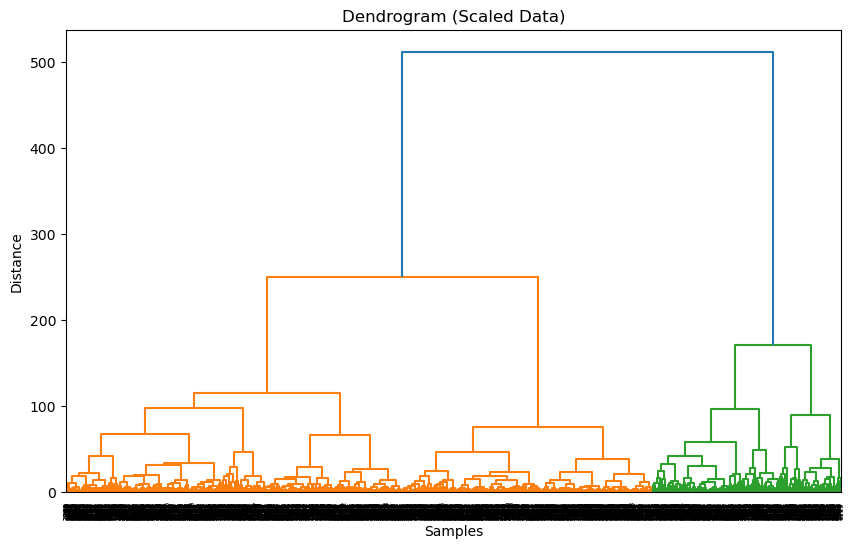

In [82]:
# Добавим дендограммы к визуализации для иерархической кластеризации со стандартизацией (пациенты без гипогликемии)
print("Dendrogram: Patients without Hypoglycemia (Scaled Data)")
plot_dendrogram(patients_no_hypo_scaled, "Dendrogram (Scaled Data)")

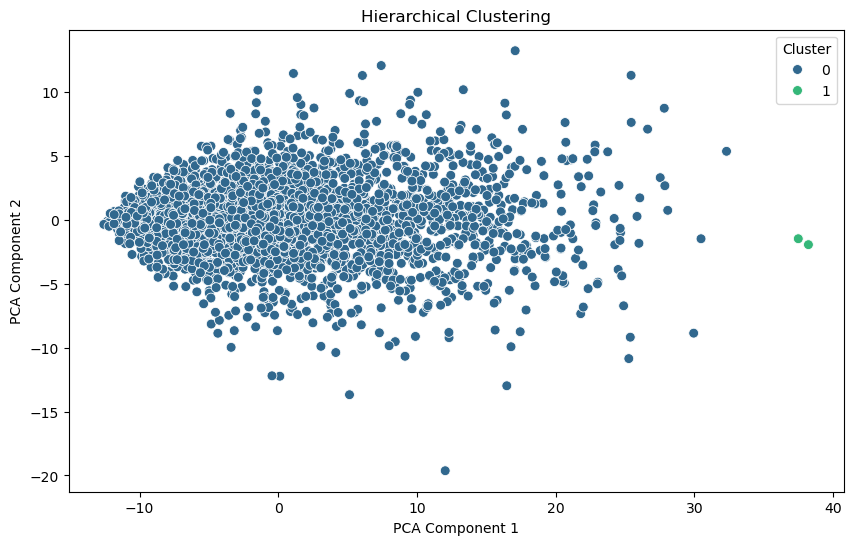

In [69]:
labels_hierarchical, score_hierarchical = perform_clustering(patients_no_hypo_scaled, 'hierarchical', best_params_hierarchical)
visualize_clusters(patients_no_hypo_scaled, labels_hierarchical, "Hierarchical Clustering")

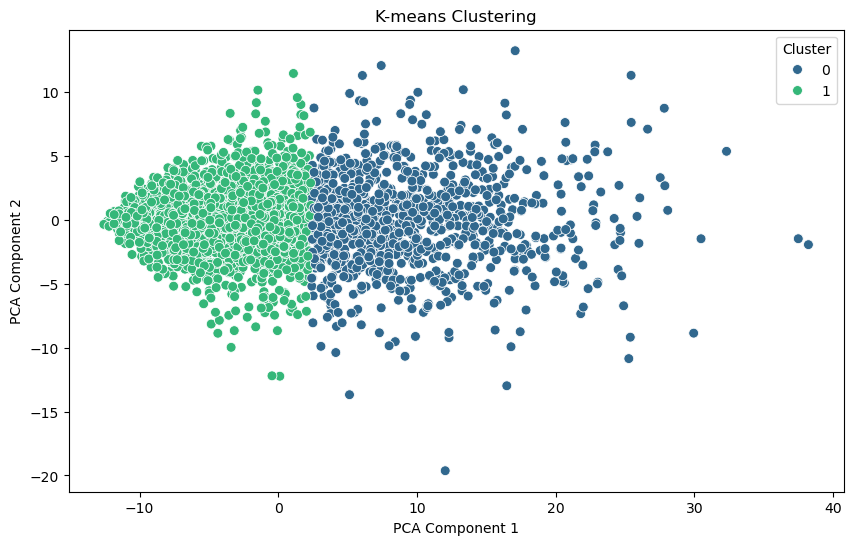

In [71]:
labels_kmeans, score_kmeans = perform_clustering(patients_no_hypo_scaled, 'kmeans', {'n_clusters': best_n_clusters_kmeans})
visualize_clusters(patients_no_hypo_scaled, labels_kmeans, "K-means Clustering")

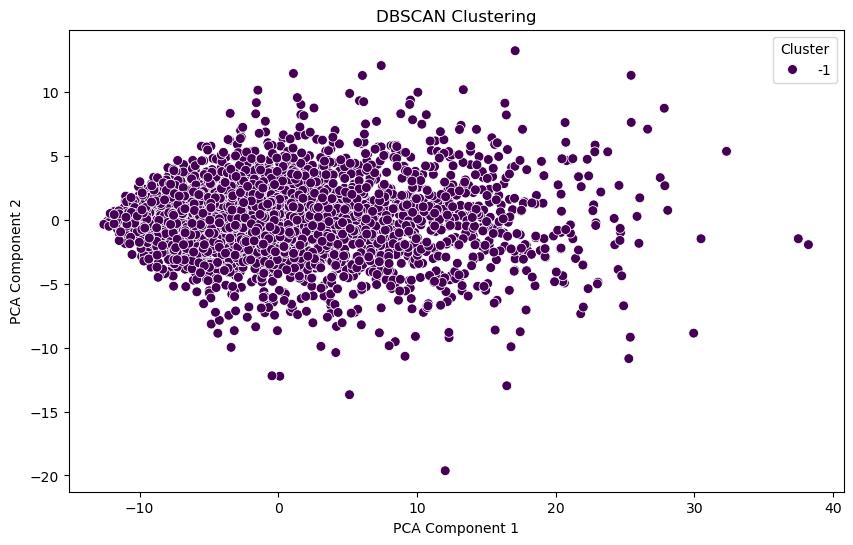

In [72]:
labels_dbscan, score_dbscan = perform_clustering(patients_no_hypo_scaled, 'dbscan', {'eps': 0.5, 'min_samples': 5})
visualize_clusters(patients_no_hypo_scaled, labels_dbscan, "DBSCAN Clustering")

<p><strong>Вывод:</strong></p>
<ul><li>Стандартизация улучшила результаты для всех методов, особенно для иерархической кластеризации.</li><li>Индекс силуэта вырос после стандартизации, что подтверждает улучшение качества кластеризации.</li></ul>

In [73]:
best_params_hierarchical, best_score_hierarchical = hierarchical_clustering(patients_with_hypo_scaled, metrics, linkages, n_clusters_range)

print("Best params for hierarchical clustering:", best_params_hierarchical)
print("Best silhouette score:", best_score_hierarchical)

Best params for hierarchical clustering: {'metric': 'euclidean', 'linkage': 'average', 'n_clusters': 2}
Best silhouette score: 0.6023088192638462


In [74]:
best_n_clusters_kmeans, best_score_kmeans = kmeans_clustering(patients_with_hypo_scaled, n_clusters_range)

print("Best number of clusters for K-means:", best_n_clusters_kmeans)
print("Best silhouette score:", best_score_kmeans)

Best number of clusters for K-means: 2
Best silhouette score: 0.466879982402296


In [75]:
best_params_dbscan, best_score_dbscan = dbscan_clustering(patients_with_hypo_scaled, eps_range, min_samples_range)

print("Best params for DBSCAN:", best_params_dbscan)
print("Best silhouette score:", best_score_dbscan)

Best params for DBSCAN: {}
Best silhouette score: -1


Dendrogram: Patients with Hypoglycemia (Scaled Data)


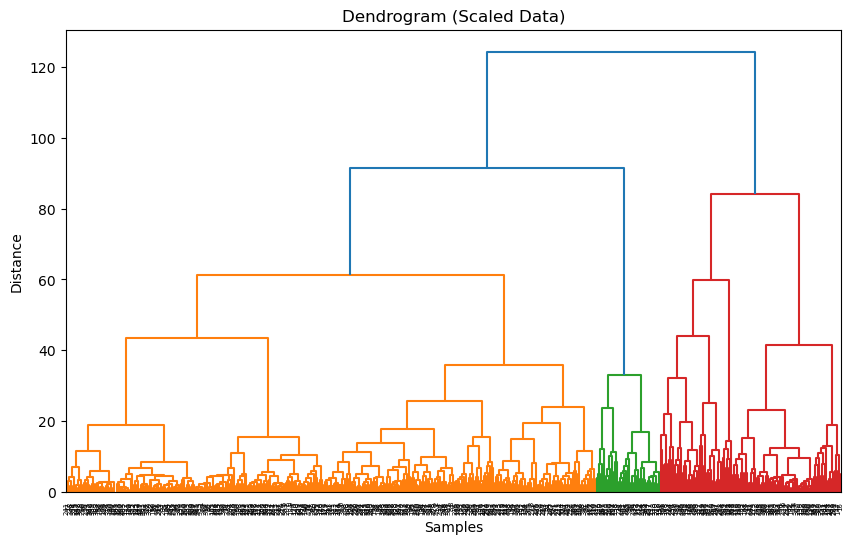

In [86]:
# Добавим дендограммы к визуализации для иерархической кластеризации со стандартизацией (пациенты с гипогликемии)
print("Dendrogram: Patients with Hypoglycemia (Scaled Data)")
plot_dendrogram(patients_with_hypo_scaled, "Dendrogram (Scaled Data)")

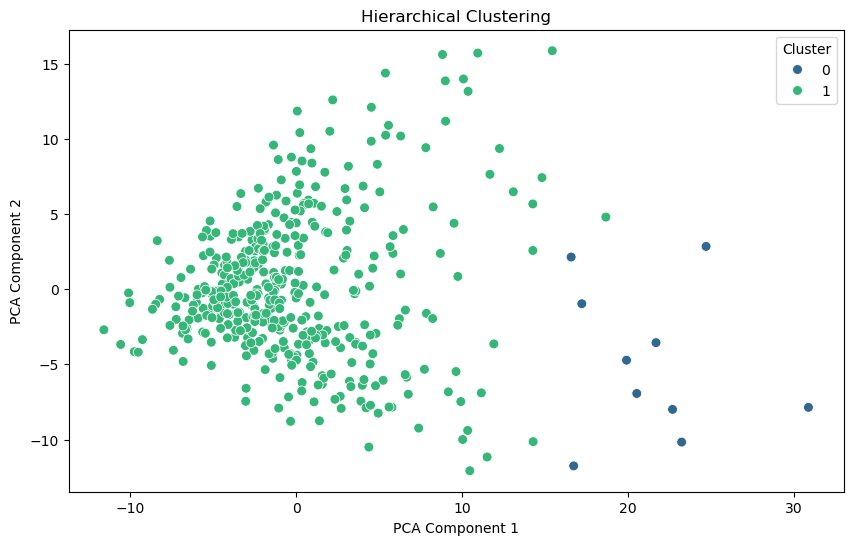

In [78]:
labels_hierarchical, score_hierarchical = perform_clustering(patients_with_hypo_scaled, 'hierarchical', best_params_hierarchical)
visualize_clusters(patients_with_hypo_scaled, labels_hierarchical, "Hierarchical Clustering")

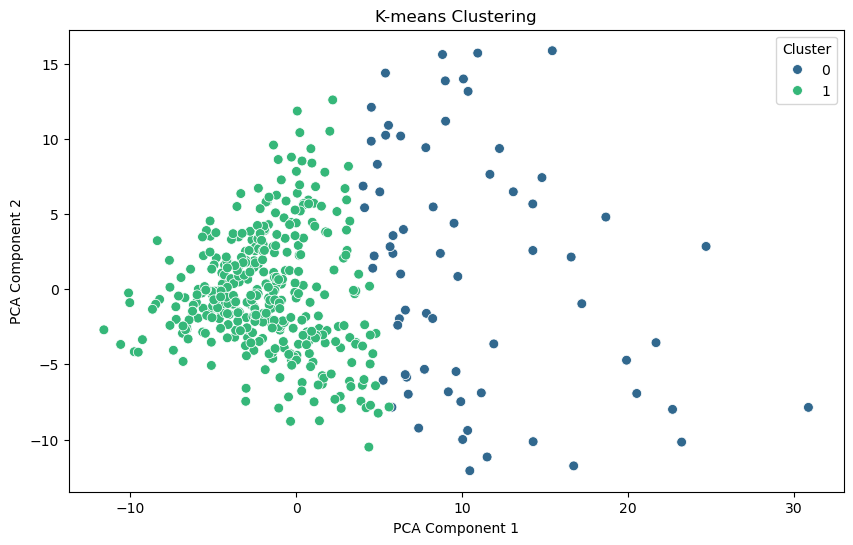

In [90]:
labels_kmeans, score_kmeans = perform_clustering(patients_with_hypo_scaled, 'kmeans', {'n_clusters': best_n_clusters_kmeans})
visualize_clusters(patients_with_hypo_scaled, labels_kmeans, "K-means Clustering")

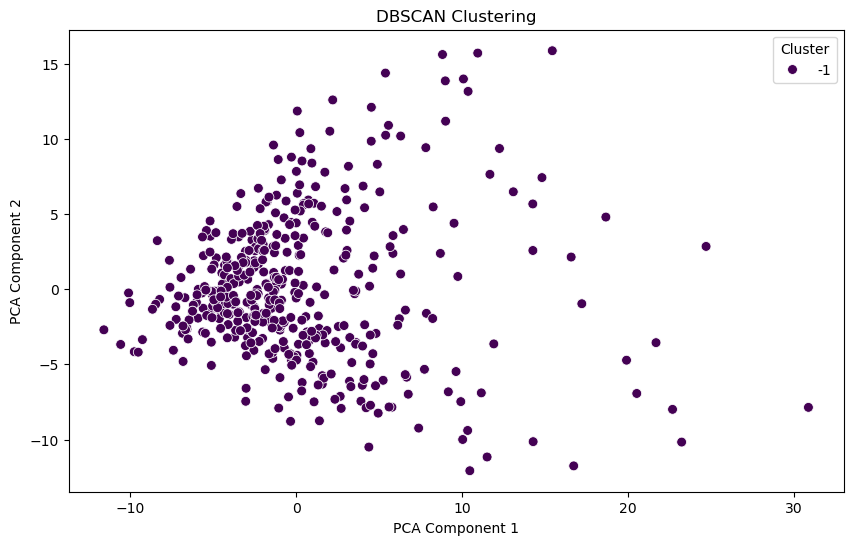

In [91]:
labels_dbscan, score_dbscan = perform_clustering(patients_with_hypo_scaled, 'dbscan', {'eps': 0.5, 'min_samples': 5})
visualize_clusters(patients_with_hypo_scaled, labels_dbscan, "DBSCAN Clustering")

<p><strong>Вывод:</strong></p>
<ul><li>Стандартизация улучшила результаты для всех методов, особенно для иерархической кластеризации.</li><li>Индекс силуэта вырос после стандартизации, что подтверждает улучшение качества кластеризации.</li></ul>

<h3>Задание 6: Глобальный вывод</h3>
<ul><li>Стандартизация улучшила кластеризацию, особенно для иерархической кластеризации.</li><li>DBSCAN оказался чувствителен к выбору параметров, его результат нестабилен.</li><li>Пациенты с гипогликемией кластеризуются лучше, чем пациенты без гипогликемии, возможно, из-за разницы в динамике временных рядов.</li></ul>